<a href="https://colab.research.google.com/github/Jay5852/100-days-machine-learning-daily-practice/blob/main/model_evaluation_and_tuning/regression_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/placement new.csv')

In [11]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [10]:
df.shape

(200, 2)

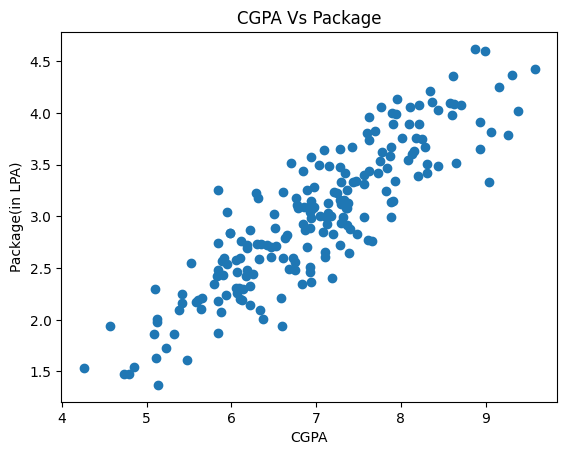

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')
plt.title('CGPA Vs Package')
plt.show()

In [16]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [19]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [20]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [23]:
lr.fit(X_train,y_train)

LinearRegression()

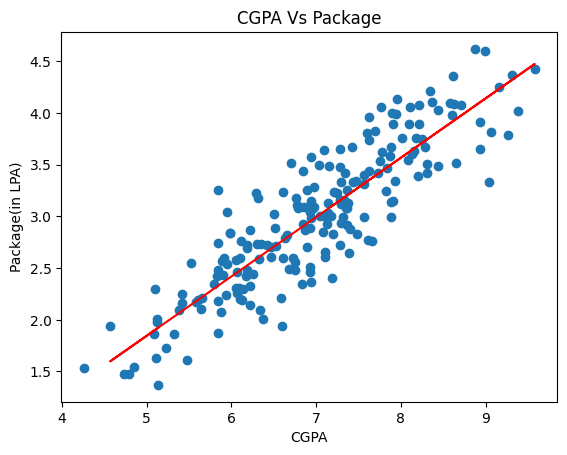

In [24]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')
plt.title('CGPA Vs Package')
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [26]:
y_pred =lr.predict(X_test)

In [27]:
y_test

,package
95,2.79
15,3.23
30,3.26
158,3.04
128,3.34
115,4.21
69,2.94
170,2.87
174,2.99
45,3.58


In [34]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_Score",r2_score(y_test,y_pred))

MAE 0.23150985393278373
MSE 0.08417638361329656
RMSE 0.2901316659954521
R2_Score 0.7730984312051673


In [35]:
r2 = r2_score(y_test,y_pred)

In [36]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [37]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7671273372895138

In [38]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.161443,3.26
1,5.12,0.087087,1.98
2,7.82,0.674982,3.25
3,7.42,0.245756,3.67
4,6.94,0.473361,3.57


Text(0, 0.5, 'Package(in lpa)')

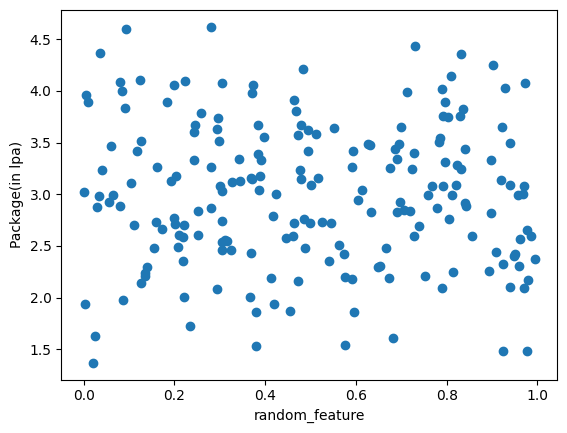

In [39]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [40]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
y_pred = lr.predict(X_test)

In [45]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7849764461411097


In [46]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7733535513379265

In [47]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [48]:
new_df2.sample(5)

,cgpa,iq,package
21,6.85,3.83,2.93
37,5.90,2.73,2.43
128,7.93,2.44,3.34
134,7.20,3.33,2.83
141,6.76,3.18,3.18


Text(0, 0.5, 'Package(in lpa)')

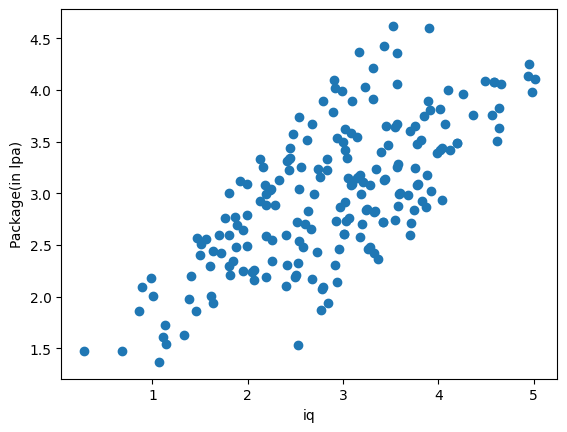

In [49]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [50]:
np.random.randint(-100,100)

-31

In [51]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [54]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8338502322249155


In [55]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8248691636965325